# Demonstration of NUFFT

In [1]:
%matplotlib inline
import riesling as rl
os=1.3
recon_settings=f'--kernel=KB3 --os={os}'

First generate a single-channel phantom.

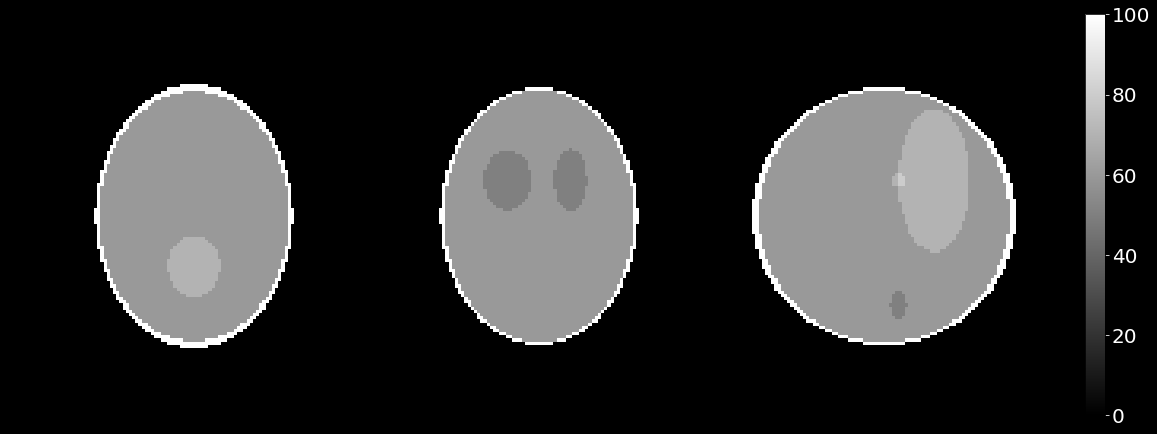

In [2]:
!riesling phantom --fov=192 --matrix=96 --shepp_logan --channels=1 \
  'phantom.h5' --nthreads=16 --os={os} --nex=0.25
rl.images.single('phantom.h5', dset='phantom')

First, show the trajectory and reconstruct the image with no density compensation to illustrate why we need it with 3D radial. Note the central part of k-space is massively overweighted, leading to low spatial frequences overwhelming the image.

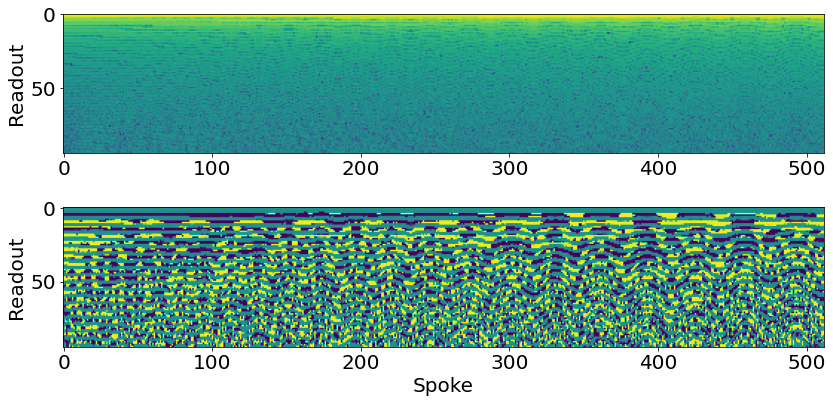

In [3]:
!riesling nufft --fwd 'phantom.h5' --dset='phantom'
rl.plots.kspace('phantom-nufft.h5', dset='nufft-forward')

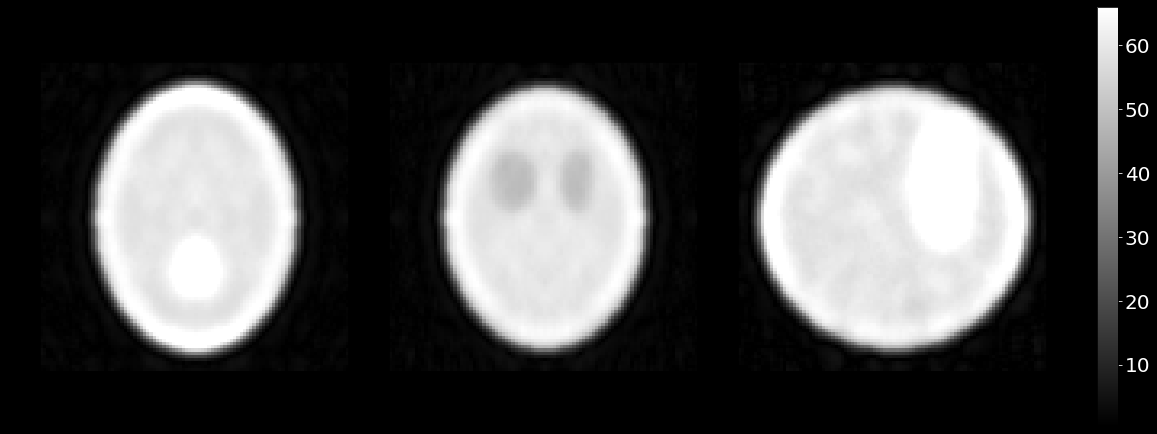

In [4]:
!riesling nufft 'phantom-nufft.h5' --sdc=pipenn -o check
rl.images.single('check-nufft.h5', dset='nufft-backward')